In [1]:
import numpy as np
import mne
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from scipy.stats import zscore, linregress, ttest_ind, ttest_rel, ttest_1samp
import pandas as pd
from mne.preprocessing.bads import _find_outliers
import os 
import joblib
import emd
import re
import scipy

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
import sys
sys.path.append('/Users/alexandrafink/Documents/GraduateSchool/SaezLab/SWB/ephys_analysis/scripts/saez_python_pipeline/LFPAnalysis')

In [3]:
from LFPAnalysis import lfp_preprocess_utils, sync_utils, analysis_utils, nlx_utils

# Wavelet Convolution Examination

In [ ]:
# Set some spectrogram parameters 
freqs = np.logspace(*np.log10([4, 120]), num=20)
n_cycles = 4  
sr = 500
buf = 1.0
buf_ix = int(buf*sr)


In [32]:
freqs1 = np.logspace(*np.log10([4, 200]), num=20)
freqs2 = np.logspace(*np.log10([4, 150]), num=20) #20 isn't enough
freqs3 = np.logspace(*np.log10([4, 150]),num=30) #doesn't increase freq density in HGA - maybe consider log + linear?
freqs4= np.logspace(4, 150,num=30) #not correct! need to input logarithmic numbers to get correct output
#p.logspace(*np.log10([4, 150]),num=50) #not solution either - overrepresents lower freqs
#p.logspace(*np.log10([4, 150]),num=40) #40 is good middle ground - still overrepresents lower but upper freqs have better spacing

In [ ]:
#salman implementation
ch_pow = mne.time_frequency.tfr_array_morlet(ch_data, sfreq=epochs.info['sfreq'], 
                                    freqs=freqs, n_cycles=n_cycles, zero_mean=False, 
                                    use_fft=True, output='power', n_jobs=1)

#mne base function
mne.time_frequency.tfr_morlet(inst, freqs, n_cycles, use_fft=False, 
                              return_itc=True, decim=1, n_jobs=None, picks=None, zero_mean=True, 
                              average=True, output='power', verbose=None)

In [ ]:
#mne.time_frequency.tfr_morlet

#gives entire TFR across input freqs

#input ch data, freqs for morlet, num cycles, sampling freq, n_jobs =1 is just default/None 
##use fft = True for salman's pipeline, power output, zero_mean = False for salman (morlet wavelet not zero meaned)
#decim to reduce memory use
#if want TFR for each epoch set average = False
#picks = should be good ch - maybe change this in salman's pipeline? 


#what is morlet wavelet conv using fft vs not using fft? 

In [36]:
# plot one wavelet with same input parameters salman gave: 

from scipy import signal
#https://github.com/neurodsp-tools/neurodsp/blob/main/tutorials/timefreq/plot_MorletWavelet.py

In [51]:
# Set some spectrogram parameters 

# Define settings for a new wavelet
freq = 18 #just beta wavelet
n_cycles = 4  
omega = n_cycles
scaling = 1.0 #this is the default 
fs = 500 #sampling rate - 
wavelet_len = int(n_cycles * fs / freq) #length of wavelet 
#f = 2*s*w*r / M gives freq in Hz, so solving for M(length) = 2*scaling*omega*samprate/f



In [52]:
# Create wavelet
wavelet = signal.morlet(wavelet_len, omega, scaling)

# pi**-0.25 * exp(1j*w*x) * exp(-0.5*(x**2))
# pi**-0.25 * (exp(1j*w*x) - exp(-0.5*(w**2))) * exp(-0.5*(x**2)) wavelet equations!


In [53]:
wavelet

array([ 2.00880304e-09+1.96871981e-24j,  3.67116626e-09+1.80566591e-09j,
        5.02069142e-09+6.51452716e-09j,  3.23592038e-09+1.59969185e-08j,
       -8.13668942e-09+3.09143830e-08j, -4.04823918e-08+4.66952503e-08j,
       -1.08624965e-07+4.58885814e-08j, -2.21708091e-07-1.26734689e-08j,
       -3.59439988e-07-2.02906925e-07j, -4.27563965e-07-6.24920962e-07j,
       -1.95561274e-07-1.35695993e-06j,  7.56380500e-07-2.33042968e-06j,
        3.01138386e-06-3.10013295e-06j,  7.08744282e-06-2.52969553e-06j,
        1.28497389e-05+1.47486820e-06j,  1.84579245e-05+1.18669199e-05j,
        1.89675528e-05+3.14746009e-05j,  5.17801060e-06+6.05237418e-05j,
       -3.59868818e-05+9.23461699e-05j, -1.17613085e-04+1.07895185e-04j,
       -2.43413944e-04+7.14478029e-05j, -3.92132513e-04-6.78381068e-05j,
       -4.98544140e-04-3.62063388e-04j, -4.39633379e-04-8.32599397e-04j,
       -4.10278620e-05-1.41948710e-03j,  8.77626008e-04-1.92328602e-03j,
        2.40442936e-03-1.96694447e-03j,  4.38862384

Text(0.5, 1.0, 'Beta Freq Wavelet - 4 cycles')

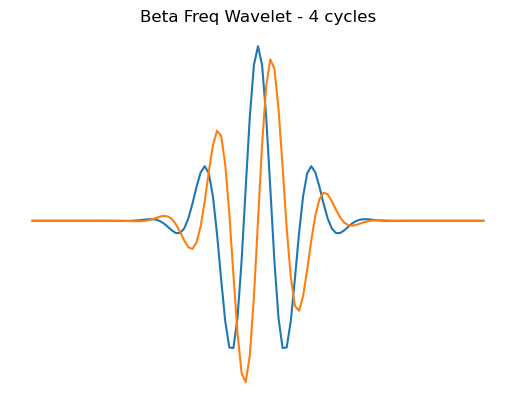

In [47]:
# Plot wavelet
_, ax = plt.subplots()
ax.plot(np.real(wavelet))
ax.plot(np.imag(wavelet))
ax.set_axis_off()
plt.title('Beta Freq Wavelet - 4 cycles')

#this will have higher temporal resolution but worse freq resolution!


Text(0.5, 1.0, 'Beta Freq Wavelet - 10 cycles')

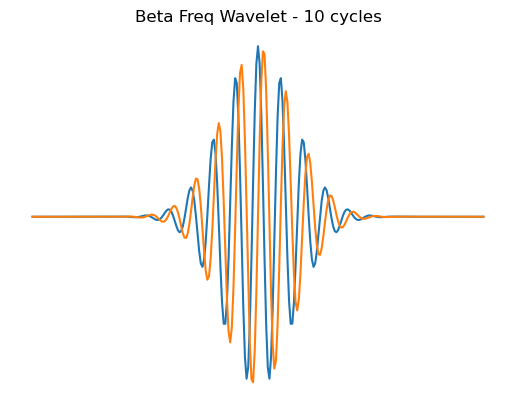

In [48]:
n_cycles = 10
omega = n_cycles
wavelet_len = int(n_cycles * fs / freq) #length of wavelet 
wavelet = signal.morlet(wavelet_len, omega, scaling)

# Plot wavelet
_, ax = plt.subplots()
ax.plot(np.real(wavelet))
ax.plot(np.imag(wavelet))
ax.set_axis_off()
plt.title('Beta Freq Wavelet - 10 cycles')

#this will have higher frequency resolution but worse temporal resolution!


In [ ]:
lfp_preprocess_utils.make_mne
lfp_preprocess_utils.ref_mne
lfp_preprocess_utils.load_elec
sync_utils.synchronize_data
lfp_preprocess_utils.make_epochs
lfp_preprocess_utils.zscore_TFR_across_trials
analysis_utils.select_picks_rois

In [ ]:
lfp_preprocess_utils.detect_bad_elecs

IED_args = {'peak_thresh':4,
           'closeness_thresh':0.25, 
           'width_thresh':0.2}


In [ ]:
mne.time_frequency.tfr_morlet
mne.time_frequency.EpochsTFR

In [ ]:
# In this library I want to write some functions that make certain statistical analyses easier to run

import scipy as sp
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

def time_resolved_regression(timeseries=None, regressors=None, win_len=200, slide_len=50):
    """
    In this function, if you provide a 2D array of z-scored time-varying neural data and a sert of regressors,
    this function will run a time-resolved generalized linear model with the provided regressor dataframe.

    Typically, this timeseries will be HFA, and the default win_len and slide_len reflect this

    timeseries: ndarray, trials x times
    regressors: pandas df, index = trials, columns = regressors
    """

    # Check the length of your time window:
    if timeseries.shape[1] % slide_len > 0:
        print('need to trim your timeseries or pick a neatly divisible window length')
        return

    # Smooth the timeseries
    smoothed_data = np.zeros([timeseries.shape[0], (timeseries.shape[1] // slide_len) - (win_len//slide_len - 1)])
    for trial in range(timeseries.shape[0]):
        smoothed_data[trial, :] = [np.nanmean(timeseries[trial, i:i+win_len]) for i in range(0, timeseries.shape[1], slide_len) if i+win_len <= timeseries.shape[1]]

    # Run the regression
    models = []
    for ts in range(smoothed_data.shape[1]):
        model_df = regressors.copy()
        model_df['dv'] = smoothed_data[:, ts]
        formula = f'dv ~ 1+'+'+'.join(regressors.columns)
        mod = smf.glm(formula=formula, data=model_df, family=sm.families.Gaussian()).fit()
        models.append(pd.DataFrame(mod.params).T)

    models = pd.concat(models)
    return models #df every regressors weights at every time point one channel at a time 

def time_resolved_regression_perm(timeseries=None, regressors=None, win_len=200, slide_len=50):

    models = time_resolved_regression(timeseries, regressors, win_len, slide_len, nsurr)

    # Generate permuted timeseries
    shuffles = np.random.randint(1, timeseries.shape[1], nsurr)
    all_surrs = [] #same thing but suffling 
    for surr in range(nsurr):
        # shuffle in time
        surr_ts = np.roll(timeseries, shuffles[surr], axis=1)
        # shuffle trials
        np.random.shuffle(surr_ts)
        # Re-run regression with permuted timeseries
        surr_models = time_resolved_regression(surr_ts, regressors, win_len, slide_len)
        all_surrs.append(surr_models)

    all_surrs = pd.concat(all_surrs)

    return all_surrs #compare permutation output to determine significance

Notes:

Check trial counts before comparing! 
multiple comparison testing
